<a href="https://colab.research.google.com/github/iamatul1214/LLMs/blob/main/Multihead_attention_illustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook contains two examples of multihead attention. one with simple numpy and another with simple transformer using keras.

### 1. Simple Numpy example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1. TOY INPUT EMBEDDINGS (3 tokens, dimension 4)
# ----------------------------------------------------------
tokens = ["I", "love", "pizza"]

X = np.array([
    [1.0, 0.0, 1.0, 0.0],   # "I"
    [0.0, 1.0, 0.0, 1.0],   # "love"
    [1.0, 1.0, 0.0, 0.0]    # "pizza"
])

# ----------------------------------------------------------
# 2. PROJECTION MATRICES FOR 2 HEADS
# ----------------------------------------------------------
W_Q1 = np.array([[1,0],[0,1],[1,0],[0,1]])
W_K1 = np.array([[1,0],[1,0],[0,1],[0,1]])
W_V1 = np.array([[1,0],[0,1],[1,0],[0,1]])

W_Q2 = np.array([[0,1],[1,0],[0,1],[1,0]])
W_K2 = np.array([[1,1],[0,1],[1,0],[0,1]])
W_V2 = np.array([[0,1],[1,0],[1,1],[0,1]])

def softmax(x):
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def attention(Q, K, V):
    scores = Q @ K.T / np.sqrt(Q.shape[1])  # scaled dot-product
    weights = np.array([softmax(row) for row in scores])
    out = weights @ V
    return weights, out

# ----------------------------------------------------------
# 3. Compute Q, K, V and Attention for each head
# ----------------------------------------------------------
Q1, K1, V1 = X @ W_Q1, X @ W_K1, X @ W_V1
Q2, K2, V2 = X @ W_Q2, X @ W_K2, X @ W_V2

weights1, out1 = attention(Q1, K1, V1)
weights2, out2 = attention(Q2, K2, V2)

# ----------------------------------------------------------
# 4. PLOTTING FUNCTIONS
# ----------------------------------------------------------
def plot_attention_heatmap(attention_weights, title):
    fig, ax = plt.subplots(figsize=(4, 4))
    cax = ax.matshow(attention_weights, cmap="viridis")
    fig.colorbar(cax)

    ax.set_xticks(range(len(tokens)))
    ax.set_yticks(range(len(tokens)))
    ax.set_xticklabels(tokens, rotation=45)
    ax.set_yticklabels(tokens)

    ax.set_title(title)
    plt.show()


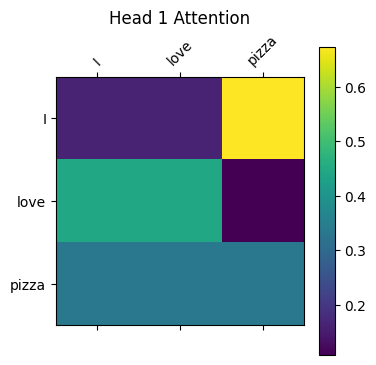

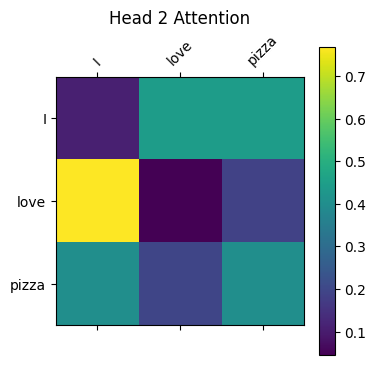

In [2]:
# ----------------------------------------------------------
# 5. SHOW EACH HEAD'S ATTENTION
# ----------------------------------------------------------
plot_attention_heatmap(weights1, "Head 1 Attention")
plot_attention_heatmap(weights2, "Head 2 Attention")

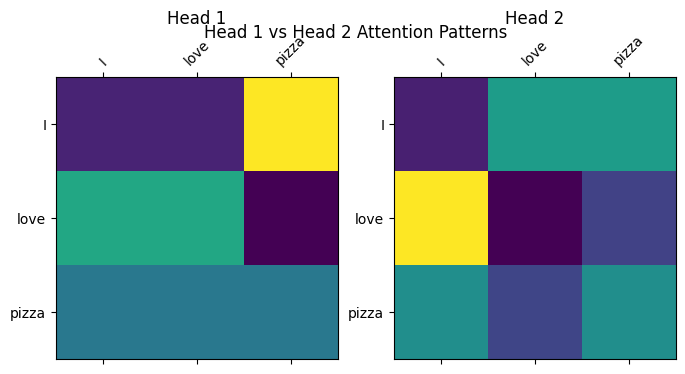

In [3]:
# ----------------------------------------------------------
# 6. SIDE-BY-SIDE COMPARISON
# ----------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].matshow(weights1, cmap="viridis")
axs[0].set_title("Head 1")
axs[0].set_xticks(range(len(tokens)))
axs[0].set_yticks(range(len(tokens)))
axs[0].set_xticklabels(tokens, rotation=45)
axs[0].set_yticklabels(tokens)

axs[1].matshow(weights2, cmap="viridis")
axs[1].set_title("Head 2")
axs[1].set_xticks(range(len(tokens)))
axs[1].set_yticks(range(len(tokens)))
axs[1].set_xticklabels(tokens, rotation=45)
axs[1].set_yticklabels(tokens)

plt.suptitle("Head 1 vs Head 2 Attention Patterns")
plt.show()

## 1. Queries, Keys, Values are just linear transforms, we just compute
```
Q = X @ W_Q
K = X @ W_K
V = X @ W_V
```
## 2. Attention is just dot-products + softmax
```
attention_scores = Q @ K.T
attention_weights = softmax(scores)
output = weights @ V
```
## 3. Multi-head = same operation but in parallel with different projections

- Head 1 focuses on one type of relationship

- Head 2 focuses on another

## 4. This is the intuition behind:

- syntactic heads

- semantic heads

- positional heads

- long-range dependency heads
